# FABRIC Experimenters Workshop: Jupyter/API Demo


## Configure the Environment

### Create the FABRIC Proxies

The FABRIC API is used via proxy objects that manage conections to the control framework. 

#### Orchestrator Proxy

Manages requests and queries for FABRIC resources. 

#### Credential Manager Proxy

Manages tokens that authorize requests. 

Fabric uses two kinds of tokens:

- Refresh Token: When user logins to Jupyterhub after authenticating against CILogon, an initial refresh token is derived. This token is available as the environment variable `CILOGON_REFRESH_TOKEN` and is used to generate the initial Identity Token. On every refresh, Fabric Refresh Token is changed and updated. each Refresh Token is valid for 24 hours.

- Identity Token: The control/measurement framework APIs require an Identity Token. Identity tokens can be gereated from a vailid Refreach Token at any time. Each Identity Token is valid upto an hour.







In [33]:
import os
import json

from fabric_cm.credmgr.credmgr_proxy import CredmgrProxy
from fabric_cf.orchestrator.orchestrator_proxy import OrchestratorProxy

#Create a FABRIC Orchestrator Proxy.
orchestrator_proxy = OrchestratorProxy(orchestrator_host=os.environ['FABRIC_ORCHESTRATOR_HOST'])

#Create a Credential Manager Proxy 
credmgr_proxy = CredmgrProxy(credmgr_host=os.environ['FABRIC_CREDMGR_HOST'])

#Cofigure SSH Key
ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read().strip()


### Save the Initial Refresh Token

In [34]:
#Retrieve or set the refresh token (exprires 24 hours after login)
fabric_refresh_token=None
%store -r fabric_refresh_token
if fabric_refresh_token is None:
    fabric_refresh_token=os.environ['CILOGON_REFRESH_TOKEN']
    %store fabric_refresh_token

print("Refresh Token: {}".format(fabric_refresh_token))

Refresh Token: https://cilogon.org/oauth2/refreshToken/465ee0a8377ab0cbba28620a36d3a9bd/1617633572367


### Refresh the ID Token

ID Tokens exprire one hour after refresh. 

In [35]:
try:
    refresh_res = credmgr_proxy.refresh(project_name='all', scope='all', refresh_token=fabric_refresh_token)

    fabric_id_token=refresh_res['id_token']
    fabric_refresh_token=refresh_res['refresh_token']
    print("New Refreash Token: {}\n".format(fabric_refresh_token))
    print("New ID Token: {}".format(fabric_id_token))
    %store fabric_refresh_token

except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))
    


New Refreash Token: https://cilogon.org/oauth2/refreshToken/67c50c1a42290132dbe45018f07dd409/1617633993448

New ID Token: eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6InBydXRoQGVtYWlsLnVuYy5lZHUiLCJjZXJ0X3N1YmplY3RfZG4iOiIvREM9b3JnL0RDPWNpbG9nb24vQz1VUy9PPVVuaXZlcnNpdHkgb2YgTm9ydGggQ2Fyb2xpbmEgYXQgQ2hhcGVsIEhpbGwvQ049UGF1bCBSdXRoIEEzMTM3OTg0MSIsImlkcCI6InVybjptYWNlOmluY29tbW9uOnVuYy5lZHUiLCJpZHBfbmFtZSI6IlVuaXZlcnNpdHkgb2YgTm9ydGggQ2Fyb2xpbmEgYXQgQ2hhcGVsIEhpbGwiLCJlcHBuIjoicHJ1dGhAdW5jLmVkdSIsImFmZmlsaWF0aW9uIjoic3RhZmZAdW5jLmVkdTttZW1iZXJAdW5jLmVkdTtlbXBsb3llZUB1bmMuZWR1IiwibmFtZSI6IlBhdWwgUnV0aCIsImFjciI6InVybjpvYXNpczpuYW1lczp0YzpTQU1MOjIuMDphYzpjbGFzc2VzOlBhc3N3b3JkUHJvdGVjdGVkVHJhbnNwb3J0IiwiZW50aXRsZW1lbnQiOiJ1cm46bWFjZTpkaXI6ZW50aXRsZW1lbnQ6Y29tbW9uLWxpYi10ZXJtcyIsImlzcyI6Imh0dHBzOi8vY2lsb2dvbi5vcmciLCJzdWIiOiJodHRwOi8vY2lsb2dvbi5vcmcvc2VydmVyQS91c2Vycy8zMTM3OTg0MSIsImF1ZCI6ImN

## Query Resource Availabiliy 

### Get Advertisment from Proxy

In [36]:
status, advertised_topology = orchestrator_proxy.resources(token=fabric_id_token)

print(f"Status: {status}")
print(f"Toplogy: {advertised_topology}")

Status: Status.OK
Toplogy: LBNL: { cpu: 6/6, core: 96/96, ram: 1536/1536G, disk: 109600/109600G, unit: 3/3, }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2, }
	Site Interfaces:
RENC: { cpu: 6/6, core: 96/96, ram: 1536/1536G, disk: 109600/109600G, unit: 3/3, }
	Components:
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2, }
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
	Site Interfaces:
UKY: { cpu: 6/6, core: 96/96, ram: 1536/1536G, disk: 109600/109600G, unit: 3/3, }
	Co

### Display Resource Topology

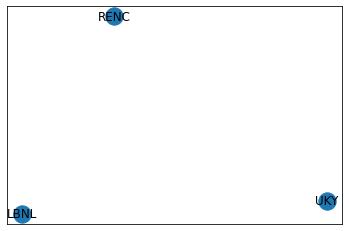

In [37]:
advertised_topology.draw()

## Build Slice Request


<img src="./figs/node.png" width="40%"><br>



In [38]:
import fim.user as fu

# Create Experiment Topology
experiemnt = fu.ExperimentTopology()

slice_name="DemoSlice"

In [39]:
# Add Node with: GPU: 1xSharedConnectX-6, 2xRTX6000, 2xP4510
node1 = experiemnt.add_node(name='node1', site='RENC')

node1_capacity = fu.Capacities()
node1_capacity.set_fields(core=2, ram=16, disk=100)
node1.set_properties(capacities=node1_capacity, image_type='qcow2', image_ref='default_ubuntu_20')

node1_nvme = node1.add_component(ctype=fu.ComponentType.NVME, model='P4510', name='n1_nvme')
node1_gpu  = node1.add_component(ctype=fu.ComponentType.GPU, model='RTX6000', name='n1_gpu')
node1_nic = node1.add_component(ctype=fu.ComponentType.SharedNIC, model='ConnectX-6', name='n1_nic')

In [40]:
# Add Node with: FastNet: 1xSharedConnectX-6, 2xConnectX-5, 2xT4, 4xP4510
node2 = experiemnt.add_node(name='node2', site='LBNL')

node2_capacity = fu.Capacities()
node2_capacity.set_fields(core=4, ram=32, disk=200)
node2.set_properties(capacities=node2_capacity, image_type='qcow2', image_ref='default_ubuntu_20')

node2_nvme = node2.add_component(ctype=fu.ComponentType.NVME, model='P4510', name='n2_nvme')
node2_gpu  = node2.add_component(ctype=fu.ComponentType.GPU, model='RTX6000', name='n2_gpu')
node2_nic  = node2.add_component(ctype=fu.ComponentType.SharedNIC, model='ConnectX-6', name='n2_nic')
#node2_nvme = node2.add_component(ctype=fu.ComponentType.SmartNIC, model='ConnectX-5', name='n2_nic2')

In [41]:
# Add Node with: SlowNet: 2xConnectX-6, 2xT4, 4xP4510
node3 = experiemnt.add_node(name='node3', site='UKY')

node3_capacity = fu.Capacities()
node3_capacity.set_fields(core=8, ram=64, disk=500)
node3.set_properties(capacities=node3_capacity, image_type='qcow2', image_ref='default_ubuntu_20')

node3_nvme = node3.add_component(ctype=fu.ComponentType.NVME, model='P4510', name='n3_nvme')
node3_gpu  = node3.add_component(ctype=fu.ComponentType.GPU, model='Tesla T4', name='n3_gpu')
node3_nic  = node3.add_component(ctype=fu.ComponentType.SharedNIC, model='ConnectX-6', name='n3_nic')
#node3_nvme = node3.add_component(ctype=fu.ComponentType.SmartNIC, model='ConnectX-5', name='n3_nic2')

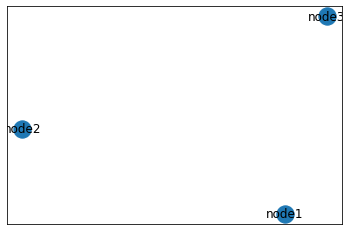

In [42]:
# Generate Slice Graph
#slice_graph = t.serialize()
experiemnt.draw()

## Submit the Request

In [43]:
slice_graph = experiemnt.serialize()

# Request slice from Orchestrator
status, reservations = orchestrator_proxy.create(token=fabric_id_token, slice_name=slice_name, slice_graph=slice_graph, ssh_key=ssh_key)


print("Request {}".format(status))
slice_id=reservations[0].slice_id

print("Reservations: {}".format(reservations))
print("Slice ID: {}".format(slice_id))

Request Status.OK
Reservations: [{
    "graph_node_id": "c29a54f2-0ab6-40ed-8624-193baea6bb66",
    "join_state": "None_",
    "lease_end": "2021-04-06 14:46:54",
    "reservation_id": "f8718ebe-536e-4eee-b5e1-163b04d2c658",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09"
}, {
    "graph_node_id": "8cd4fbae-d136-4d89-89a5-27586e77d85a",
    "join_state": "None_",
    "lease_end": "2021-04-06 14:46:54",
    "reservation_id": "e4842adf-d7e0-4538-b9ec-ed3d648fc4e3",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09"
}, {
    "graph_node_id": "e7f1da4d-c594-44a0-bcea-f7f69401098e",
    "join_state": "None_",
    "lease_end": "2021-04-06 14:46:54",
    "reservation_id": "f27d9b57-9546-4e81-8fe9-8070f88299a3",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09"
}]
Slice ID: b15d46a5-c46d-406a

## Query Slices

In [44]:
status, slices = orchestrator_proxy.slices(token=fabric_id_token)

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.OK
Slices [{
    "graph_id": "c28a0888-9469-4cee-92f9-3232f793f19d",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09",
    "slice_name": "DemoSlice",
    "slice_state": "Configuring"
}]


## Slice Status

In [45]:
import time

slice_state=None
while slice_state != 'StableOK':
    status, slice_status = orchestrator_proxy.slice_status(token=fabric_id_token, slice_id=slice_id)
    slice_state = slice_status.slice_state
    print("Slice State: {}".format(slices[0].slice_state))
    time.sleep(20)

#status, slice_status = orchestrator_proxy.slice_status(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Slice Status {}".format(slice_status))

Slice State: Configuring
Slice State: Configuring
Slice State: Configuring
Slice State: Configuring
Slice State: Configuring
Slice State: Configuring
Slice State: Configuring
Slice State: Configuring
Slice State: Configuring
Response Status Status.OK
Slice Status {
    "graph_id": "c28a0888-9469-4cee-92f9-3232f793f19d",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09",
    "slice_name": "DemoSlice",
    "slice_state": "StableOK"
}


## Query Slivers

In [46]:
status, slivers = orchestrator_proxy.slivers(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Slivers {}".format(reservations))

Response Status Status.OK
Slivers [{
    "graph_node_id": "c29a54f2-0ab6-40ed-8624-193baea6bb66",
    "join_state": "None_",
    "lease_end": "2021-04-06 14:46:54",
    "reservation_id": "f8718ebe-536e-4eee-b5e1-163b04d2c658",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09"
}, {
    "graph_node_id": "8cd4fbae-d136-4d89-89a5-27586e77d85a",
    "join_state": "None_",
    "lease_end": "2021-04-06 14:46:54",
    "reservation_id": "e4842adf-d7e0-4538-b9ec-ed3d648fc4e3",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09"
}, {
    "graph_node_id": "e7f1da4d-c594-44a0-bcea-f7f69401098e",
    "join_state": "None_",
    "lease_end": "2021-04-06 14:46:54",
    "reservation_id": "f27d9b57-9546-4e81-8fe9-8070f88299a3",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09"
}]


## Sliver Status

In [47]:
for sliver in slivers:
    sliver_id=sliver.reservation_id
    status, reservation_status = orchestrator_proxy.sliver_status(token=fabric_id_token, slice_id=slice_id, sliver_id=sliver_id)

    print("Response Status {}".format(status))
    print("Reservation Status {}".format(reservation_status))

Response Status Status.OK
Reservation Status {
    "capacities": "{\"core\": 8, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "e7f1da4d-c594-44a0-bcea-f7f69401098e",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-06 14:46:54",
    "management_ip": "128.163.179.25",
    "name": "node3",
    "notices": "Reservation f27d9b57-9546-4e81-8fe9-8070f88299a3 (Slice DemoSlice(b15d46a5-c46d-406a-8157-4f2ae4ca0e09) Graph Id:c28a0888-9469-4cee-92f9-3232f793f19d ) is in state [Active,None_]\n\nLast ticket update: \nTicket events: \nLast ticket update: \nTicket events: ",
    "reservation_id": "f27d9b57-9546-4e81-8fe9-8070f88299a3",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "UKY",
    "slice_id": "b15d46a5-c46d-406a-8157-4f2ae4ca0e09"
}
Response Status Status.OK
Reservation Status {
    "capacities": "{\"core\": 4, \"disk\": 200, \"ram\": 32}",
    "graph_node_id": "8cd4fbae-d136-4d89-89a5-27586e77d85a",
    "join_state": "NoJoin",
    "la

## Delete Slice

In [51]:
status, result = orchestrator_proxy.delete(token=fabric_id_token, slice_id=slice_id)
#status, result = orchestrator_proxy.delete(token=fabric_id_token, slice_id='ed126ff2-7c36-4524-8880-ba6fcf04b86b')

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.OK
Response received {'value': None}


## Check out your new node

In [48]:
script= '#!/bin/bash  \n' \
        'lspci  \n'

In [49]:
import paramiko 
#from scp import SCPClient, SCPException

key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client = paramiko.SSHClient()
client.load_system_host_keys()
client.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client.set_missing_host_key_policy(paramiko.AutoAddPolicy())

for sliver in slivers:
    sliver_id=sliver.reservation_id
    node_name = sliver.name
    management_ip = sliver.management_ip
    
    print("Node {0} IP {1}".format(node_name, management_ip))
    
    client.connect(management_ip,username='ubuntu',pkey = key)

    stdin, stdout, stderr = client.exec_command('echo \"' + script + '\" > script.sh; chmod +x script.sh; sudo ./script.sh')
    #print (stdout.read())
    #print (stderr.read())
    print ('')
    print (str(stdout.read(),'utf-8').replace('\\n','\n'))
    #print ('stderr:')
    #print (str(stderr.read(),'utf-8').replace('\\n','\n'))

    client.close()

Node node3 IP 128.163.179.25

00:00.0 Host bridge: Intel Corporation 440FX - 82441FX PMC [Natoma] (rev 02)
00:01.0 ISA bridge: Intel Corporation 82371SB PIIX3 ISA [Natoma/Triton II]
00:01.1 IDE interface: Intel Corporation 82371SB PIIX3 IDE [Natoma/Triton II]
00:01.2 USB controller: Intel Corporation 82371SB PIIX3 USB [Natoma/Triton II] (rev 01)
00:01.3 Bridge: Intel Corporation 82371AB/EB/MB PIIX4 ACPI (rev 03)
00:02.0 VGA compatible controller: Cirrus Logic GD 5446
00:03.0 Ethernet controller: Red Hat, Inc. Virtio network device
00:04.0 SCSI storage controller: Red Hat, Inc. Virtio block device
00:05.0 Unclassified device [00ff]: Red Hat, Inc. Virtio memory balloon
00:06.0 Unclassified device [00ff]: Red Hat, Inc. Virtio RNG
00:07.0 Non-Volatile memory controller: Intel Corporation NVMe Datacenter SSD [3DNAND, Beta Rock Controller]
00:08.0 3D controller: NVIDIA Corporation TU104GL [Tesla T4] (rev a1)
00:09.0 Ethernet controller: Mellanox Technologies MT28908 Family [ConnectX-6]

Node